# Logistic Regression with a Neural Network mindset

Logistic Regression을 통해서 고양이인지 여부를 판단하는 분류기(classifier)를 작성하는 과제를 수행합니다. 이를 통해서 신경망과 딥러닝에 대한 이해를 높입니다. 

**주의:**
- for 또는 while과 같은 루프는 성능을 매우 저하시킵니다. 루프는 명시되지 않은 경우 사용을 하지 않도록 하세요. 


**배울 내용들:**
- 학습 알고리즘의 기초들:
    - 파라미터의 초기화
    - cost function의 계산과 gradient의 계산
    - gradient descent를 이용한 최적화 알고리즘
- 위의 3가지 기능을 하나의 딥러닝 모델에 적절한 순서로 배치하기.

**참조**
위치 정보와 함께 학습하는거 : conbolution network
logistic regression 은 1차적인 함수이다.

## 1 - Packages ##

다음의 파이선 패키지들이 과제를 위해서 필요합니다. import하도록 하세요. 
- [numpy](www.numpy.org)는 파이선에서 텐서 연산을 할수있도록 합니다. 
- [h5py](http://www.h5py.org)는 H5라는 형식으로 저장된 데이터를 읽고, 저장하기 위해서 필요합니다. 
- [matplotlib](http://matplotlib.org)는 다양한 형태의 그래프를 그리는데 유용합니다.
- [PIL](http://www.pythonware.com/products/pil/)과 [scipy](https://www.scipy.org/)는 사진을 다루기 위해서 필요합니다. 

In [2]:
import numpy as np
import matplotlib.pyplot as plt # 그래프 그릴때 쓰는 lib
import h5py
import scipy
from PIL import Image
from scipy import ndimage
from lr_utils import load_dataset

%matplotlib inline

## 2 - Overview of the Problem set ##

**Problem Statement**: 주어진 "data.h5"데이터셋은 다음을 포함합니다. :
- m_train개의 학습 데이터는 "고양이" (y=1) 또는 "고양이-아님" (y=0)으로 레이블이 되어 있음.
- m_test개의 테스트 데이터는 "고양이" (y=1) 또는 "고양이-아님" (y=0)으로 레이블이 되어 있음.
- 각각의 이미지는 (num_px, num_px, 3)의 모양(shape)을 갖는 텐서입니다. 즉, 가로가 num_px, 세로가 num_px의 크기이며, RGB의 3개의 채널을 갖는 이미지입니다.

당신은 이미즈를 "고양이"인지 아닌지를 분류하는 classifier를 작성해야합니다.

먼저, 데이터셋에 익숙해지기 위해서, 다음 코드로 데이터셋을 불러옵니다. 

In [3]:
# Loading the data (cat/non-cat)
train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes = load_dataset()

print(train_set_x_orig.shape) #img
print(train_set_y.shape) #labeling
print(classes.shape)
print(test_set_x_orig.dtype)
print(test_set_y.dtype)

(209, 64, 64, 3)
(1, 209)
(2,)
uint8
int64


In [27]:
## 2024-10-15 수업시간 작성
print(train_set_x_orig[0]) # 첫번째 example
print(train_set_x_orig[0].shape) # shape
print(np.max(train_set_x_orig[0])) # max
print(np.min(train_set_x_orig[0])) # min

[[[17 31 56]
  [22 33 59]
  [25 35 62]
  ...
  [ 1 28 57]
  [ 1 26 56]
  [ 1 22 51]]

 [[25 36 62]
  [28 38 64]
  [30 40 67]
  ...
  [ 1 27 56]
  [ 1 25 55]
  [ 2 21 51]]

 [[32 40 67]
  [34 42 69]
  [35 42 70]
  ...
  [ 1 25 55]
  [ 0 24 54]
  [ 1 21 51]]

 ...

 [[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 [[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 [[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]]
(64, 64, 3)
243
0


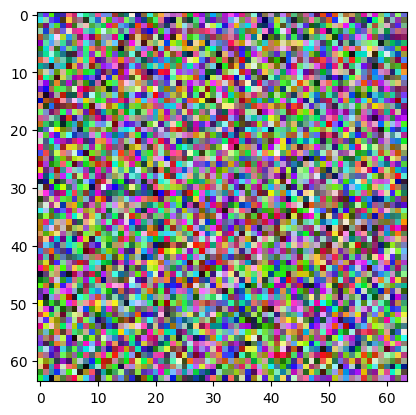

In [32]:
# myimage = np.zeros((64,64,3), dtype=np.uint8) ## black image
# myimage = np.full((64,64,3), 255, dtype = np.uint8) ## white white image
myimage = np.random.randint(0, 255, (64,64,3), dtype=np.uint8 ) ## random color image

plt.imshow(myimage)


데이터셋들에 "_orig"라는 이름이 붙어있는데, 이것은 우리가 지금의 데이터셋을 전처리(preprocessing)하여 새로운 데이터를 만들려고 하기 때문입니다. 
전처리가 된 데이터들은 train_set_x, test_set_x같은 이름을 갖도록 할것입니다. 

train_set_x_orig 와 test_set_x_orig에서 각각의 라인은 하나의 이미지를 나타냅니다. 다음을 통해 하나의 이미지를 확인해보겠습니다. 변수 index의 값을 바꾸어서 다른 이미지도 확인해보세요. 

y = 0, it's a 'non-cat' picture.


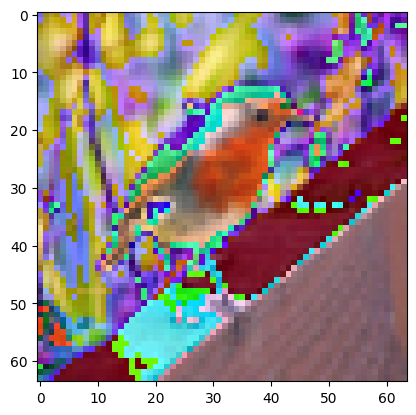

In [42]:
# Example of a picture
index = 10
plt.imshow(train_set_x_orig[index]) #matplotlib 으로 이미지로 변환함
plt.imshow(train_set_x_orig[index][10:50, 10:50, :]) # 자르기
plt.imshow(train_set_x_orig[index][50:10:-1, 50:10:-1, :]) # 거꾸로 뒤집기 
plt.imshow(train_set_x_orig[index][::-1, ::-1, :]) # -1 뜻 = X:Y:-1 -1씩 X에서 Y로 다가간다. 
plt.imshow(train_set_x_orig[index][::+2, ::+2, :]) # -1 뜻 = X:Y:2 2씩 X에서 Y로 다가간다.
plt.imshow(train_set_x_orig[index] * 2) # 명도 변경 * = 곱하기, // = 나누기 

print ("y = " + str(train_set_y[0, index]) + ", it's a '" + classes[np.squeeze(train_set_y[:, index])].decode("utf-8") +  "' picture.")


딥러닝 프로그램에서 가장 흔한 에러는 matrix와 vector의 차원(dimension)이 맞지 않아서 발생합니다. 
텐서의 차원에 대해서 주의를 항상 써야합니다. 
**Exercise:** 다음 값들을 찾아보세요:
- m_train (training examples의 갯수)
- m_test (test examples의 갯수)
- num_px (학습 이미지의 height 와 width)

`train_set_x_orig`은 (m_train, num_px, num_px, 3)의 shape를 갖는 numpy 어레이(텐서)입니다. 
예를 들어, m_train은 'train_set_x_orig.shape[0]'로 접근할수 있습니다. 

In [43]:
### START CODE HERE ### (≈ 3 lines of code)
m_train = train_set_x_orig.shape[0]
m_test = test_set_x_orig.shape[0]
num_px = train_set_x_orig[index].shape[0]
#num_px = f"height = {train_set_x_orig[index].shape[0]}, width = {train_set_x_orig[index].shape[1]}"

### END CODE HERE ###

print ("Number of training examples: m_train = " + str(m_train))
print ("Number of testing examples: m_test = " + str(m_test))
print ("Height/Width of each image: num_px = " + str(num_px))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("train_set_x shape: " + str(train_set_x_orig.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x shape: " + str(test_set_x_orig.shape))
print ("test_set_y shape: " + str(test_set_y.shape))

Number of training examples: m_train = 209
Number of testing examples: m_test = 50
Height/Width of each image: num_px = 64
Each image is of size: (64, 64, 3)
train_set_x shape: (209, 64, 64, 3)
train_set_y shape: (1, 209)
test_set_x shape: (50, 64, 64, 3)
test_set_y shape: (1, 50)


**다음 같은 값들이 출력되어야 합니다.**: 
<table style="width:15%">
  <tr>
    <td>m_train </td>
    <td> 209 </td> 
  </tr>
  <tr>
    <td>m_test</td>
    <td> 50 </td> 
  </tr>
  <tr>
    <td>num_px</td>
    <td> 64 </td> 
  </tr>
  
</table>


 모양(shape)이 (num_px, num_px, 3)인 numpy-array 이미지를  (num_px $*$ num_px $*$ 3, 1)의 모양을 갖도록 변형하여 사용합니다. 
 지금부터는 training과 test 데이터셋의 이미지는 평탄화되어 하나의 이미지가 하나의 컬럼(column)으로 표현됩니다. 
 따라서, 학습 데이터셋은 m_train개의 컬럼을 갖게 됩니다. 

**Exercise:** 
training과 test 데이터셋의 모양이 (num\_px $*$ num\_px $*$ 3, 1)이 되도록 만드세요. 

힌트로서, (a, b, c, d)의 모양을 갖는 텐서 X를 평탄(flatten)화 시켜서 (b$*$c$*$d, a)로 만들기 위해서는 다음의 코드를 사용합니다:
```python
X_flatten = X.reshape((X.shape[0], -1)).T      # X.T is the transpose of X
```
또는,
```python
X_flatten = np.reshape(X, (X.shape[0], -1)).T
```

In [7]:
# Reshape the training and test examples

### START CODE HERE ### (≈ 2 lines of code)
train_set_x_flatten = np.reshape(train_set_x_orig, (train_set_x_orig.shape[0], -1)).T ## T = 배열을 뒤집음 (209, 12288) -> (12288 , 209)
test_set_x_flatten = np.reshape(test_set_x_orig,(test_set_x_orig.shape[0], -1)).T

### END CODE HERE ###
print ("train_set_x_flatten shape: " + str(train_set_x_flatten.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x_flatten shape: " + str(test_set_x_flatten.shape))
print ("test_set_y shape: " + str(test_set_y.shape))
print ("sanity check after reshaping: " + str(train_set_x_flatten[0:5,0]))

train_set_x_flatten shape: (12288, 209)
train_set_y shape: (1, 209)
test_set_x_flatten shape: (12288, 50)
test_set_y shape: (1, 50)
sanity check after reshaping: [17 31 56 22 33]


**다음 같은 값들이 출력되어야 합니다.**: 

<table style="width:35%">
  <tr>
    <td>train_set_x_flatten shape</td>
    <td> (12288, 209)</td> 
  </tr>
  <tr>
    <td>train_set_y shape</td>
    <td>(1, 209)</td> 
  </tr>
  <tr>
    <td>test_set_x_flatten shape</td>
    <td>(12288, 50)</td> 
  </tr>
  <tr>
    <td>test_set_y shape</td>
    <td>(1, 50)</td> 
  </tr>
  <tr>
  <td>sanity check after reshaping</td>
  <td>[17 31 56 22 33]</td> 
  </tr>
</table>

컬러 이미지의 한 픽셀은 red, green, blue의 3개 채널로 구성됩니다. 따라서, 한 픽셀은 실제 0-255사이의 값을 갖는 3개의 숫자 벡터입니다. 

머신러닝에서 일반적인 데이터의 전처리는 평균(mean)을 빼고, 표준편차(standard deviation)로 나누어서 표준화 시키는 것입니다. 
그러나, 이미지 데이터에서는 각 픽셀값들을 255로 나누어서 부동소수점으로 만드는 것으로 충분한 경우가 많습니다. 

데이터셋을 표준화시켜 봅시다. 

(12288, 209)
(209,)
<class 'numpy.ndarray'>
<class 'numpy.float64'>
0.06666666666666667


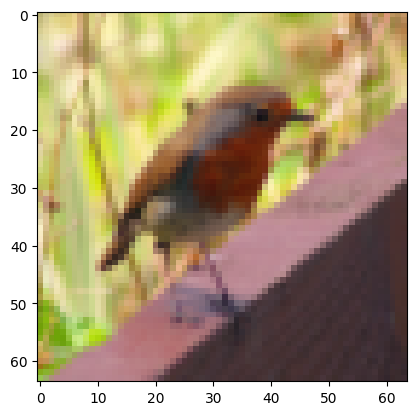

In [46]:

train_set_x = train_set_x_flatten/255.
test_set_x = test_set_x_flatten/255.

print(train_set_x.shape)
#print(train_set_x[:,0]) # 첫번째 example 
#print(train_set_x[:,0].reshape((64,64,3))) # 첫번째 example reshape
plt.imshow(train_set_x[:,10].reshape((64,64,3))) # reshape AND image show
print(train_set_x[0].shape)
print(type(train_set_x[0]))
print(type(train_set_x[0][0]))
print(train_set_x[0][0])


**기억할것들:**

데이터셋을 위한 일반적인 표준화 방법은:
- 다룰 데이터셋의 모양(shape)을 파악합니다. (m_train, m_test, num_px, ...)
- 각각의 example들이 (num_px \* num_px \* 3, 1) 모양을 갖는 벡터로 만듭니다. 
- 데이터를 "표준화"시킵니다.


## 3 - General Architecture of the learning algorithm ##

이미지가 고양이인지 아닌지를 분류할 알고리즘을 만들 차례입니다. 

다음 그림에서 보듯이 Logistic Regression은 아주 단순한 neural network라고 할수 있습니다. 

<img src="images/LogReg_kiank.png" style="width:650px;height:400px;">

**Cost값을 구하는 알고리즘의 수학적인 표현입니다**:

하나의 이미지 example $x^{(i)}$:
$$z^{(i)} = w^T x^{(i)} + b \tag{1}$$
$$\hat{y}^{(i)} = a^{(i)} = sigmoid(z^{(i)})\tag{2}$$ 
$$ \mathcal{L}(a^{(i)}, y^{(i)}) =  - y^{(i)}  \log(a^{(i)}) - (1-y^{(i)} )  \log(1-a^{(i)})\tag{3}$$

cost는 모든 training examples들을 loss들을 더해서 평균을 구합니다: (Corss entropy lost function)
$$ J = \frac{1}{m} \sum_{i=1}^m \mathcal{L}(a^{(i)}, y^{(i)})\tag{6}$$

**Key steps**:
다음 연습에서는 다음과 같은 과정을 완성해야합니다.:
- 모델의 파라미터 초기화
- cost값을 최소화 파라미터 값을 학습하기
- 학습된 파라미터를 이용하여 test데이터셋에 대해서 예측(prediction)하기
- 결과 분석과 결론

## 4 - 알고리즘의 각 부분들 만들기 ## 

Neural network를 만드는 주요 과정입니다:
1. 모델의 구조를 정의합니다 (예: 입력 피쳐의 갯수 등을 결정.)
2. 모델의 파라미터를 초기화 합니다. 
3. 반복하기:
    - loss 계산하기 (forward propagation)
    - gradient 계산하기 (backward propagation)
    - 파라미터 값 갱신하기 (gradient descent)

대부분 1-3을 각각 별도록 구현하여, model()함수에 통합하게 됩니다. 

### 4.1 - 필요한 도움 함수 (helper functions) 구현

**Exercise**: `sigmod()`함수는 위의 그림에서 보이듯이 neural network의 마지막에서 사용됩니다. $sigmoid(z) = \frac{1}{1 + e^{-z}}$로 정의됩니다.
np.exp()를 사용하여 sigmod()함수를 구현하세요. 

In [47]:
def sigmoid(z):
    """
    Compute the sigmoid of z

    Arguments:
    z -- A scalar or numpy array of any size.

    Return:
    s -- sigmoid(z)
    """

    ### START CODE HERE ### (≈ 1 line of code)
    s = 1 / (1 + np.exp(-z))
    ### END CODE HERE ###
    
    return s

In [51]:
print ("sigmoid([0, 2]) = " + str(sigmoid(np.array([0,2]))))

print ("sigmoid([-2, 2]) = " + str(sigmoid(np.array([-2,2]))))
print ("sigmoid([-2, 2]) = " + str(sigmoid(np.array([-20,10]))))

sigmoid([0, 2]) = [0.5        0.88079708]
sigmoid([-2, 2]) = [0.11920292 0.88079708]
sigmoid([-2, 2]) = [2.06115362e-09 9.99954602e-01]


**다음 같은 값들이 출력되어야 합니다.**: 

<table>
  <tr>
    <td>sigmoid([0, 2])</td>
    <td> [ 0.5         0.88079708]</td> 
  </tr>
</table>

### 4.2 - 파라미터 초기화

**Exercise:** 아래에 파라미터를 초기화하세요. w는 0값들의 벡터로 초기화 합니다. numpy에서는 np.zeros()가 텐서를 0으로 만드는데 사용됩니다. 

In [10]:
def initialize_with_zeros(dim):
    """
    This function creates a vector of zeros of shape (dim, 1) for w and initializes b to 0.
    
    Argument:
    dim -- size of the w vector we want (or number of parameters in this case)
    
    Returns:
    w -- initialized vector of shape (dim, 1)
    b -- initialized scalar (corresponds to the bias)
    """
    
    ### START CODE HERE ### (≈ 2 line of code)
    w = np.zeros((dim, 1))  # (dim, 1) 크기의 제로 벡터 생성
    b = 0.                    # 바이어스 b 초기화 #.을 붙여야 실수형인것을바로 안다.
    ### END CODE HERE ###

    assert(w.shape == (dim, 1)) # true, false를 뽑아낸다.
    assert(isinstance(b, float) or isinstance(b, int))
    
    return w, b

In [11]:
dim = 2
w, b = initialize_with_zeros(dim)
print ("w = " + str(w))
print ("b = " + str(b))

w = [[0.]
 [0.]]
b = 0


**다음 같은 값들이 출력되어야 합니다.**: 

<table style="width:15%">
    <tr>
        <td>  w  </td>
        <td> [[ 0.]
 [ 0.]] </td>
    </tr>
    <tr>
        <td>  b   </td>
        <td> 0 </td>
    </tr>
</table>

이미지 입력에 대해서, w는 (num_px $\times$ num_px $\times$ 3, 1)의 모양(shape)을 갖습니다.

### 4.3 - Forward and Backward propagation

파라미터가 초기화되었으니, 'forward'와 'backward' propagation을 통해서 파라미터 값들을 학습하는 단계입니다.

**Exercise:** cost 값과 gradient를 구하는 `propagate()` 함수를 구현합니다. 

**Hints**:

Forward Propagation:
- 입력 X를 받는다.
- $A = \sigma(w^T X + b) = (a^{(1)}, a^{(2)}, ..., a^{(m-1)}, a^{(m)})$를 계산한다.
- $J = -\frac{1}{m}\sum_{i=1}^{m} \{y^{(i)}\log(a^{(i)})+(1-y^{(i)})\log(1-a^{(i)})\}$를 계산한다. (J = cost, 작으면 좋다), 

Backward Propagation:
- 다음의 2개 식을 사용합니다:
$$ \frac{\partial J}{\partial w} = \frac{1}{m}X(A-Y)^T\tag{7}$$
$$ \frac{\partial J}{\partial b} = \frac{1}{m} \sum_{i=1}^m (a^{(i)}-y^{(i)})\tag{8}$$

In [52]:
def propagate(w, b, X, Y):
    """
    Implement the cost function and its gradient for the propagation explained above

    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of size (num_px * num_px * 3, number of examples)
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat) of size (1, number of examples)

    Return:
    cost -- negative log-likelihood cost for logistic regression
    dw -- gradient of the loss with respect to w, thus same shape as w
    db -- gradient of the loss with respect to b, thus same shape as b
    
    Tips:
    - Write your code step by step for the propagation. np.log(), np.dot()
    """
    
    m = X.shape[1]
    
    # FORWARD PROPAGATION (FROM X TO COST)
    ### START CODE HERE ### (≈ 2 lines of code)
    Z = np.dot(w.T, X) + b  # Linear transformation, w.T = weight Transpose
    A = sigmoid(Z)          # Apply sigmoid to get predictions
    cost = -np.mean(Y * np.log(A) + (1 - Y) * np.log(1 - A))  # Cost function , np.mean = 평균
    ## m을 쓸 경우 cost = -1/m * np.sum(Y* np.log(A) + (1-Y) * np.log(1-A)) 
    ### END CODE HERE ###
    
    # BACKWARD PROPAGATION (TO FIND GRAD)
    ### START CODE HERE ### (≈ 2 lines of code)
    dw = (1/m) * np.dot(X, (A - Y).T)   # Gradient with respect to w
    db = (1/m) * np.sum(A - Y)          # Gradient with respect to b
    ### END CODE HERE ###

    assert(dw.shape == w.shape)
    assert(db.dtype == float)
    cost = np.squeeze(cost)
    assert(cost.shape == ())
    
    grads = {"dw": dw,
             "db": db}
    
    return grads, cost

In [53]:
w, b, X, Y = np.array([[1.],[2.]]), 2., np.array([[1.,2.,-1.],[3.,4.,-3.2]]), np.array([[1,0,1]])
grads, cost = propagate(w, b, X, Y)
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))
print ("cost = " + str(cost))

dw = [[0.99845601]
 [2.39507239]]
db = 0.001455578136784208
cost = 5.801545319394553


**다음 같은 값들이 출력되어야 합니다.**: 

<table style="width:50%">
    <tr>
        <td>   dw   </td>
      <td> [[ 0.99845601]
     [ 2.39507239]]</td>
    </tr>
    <tr>
        <td>   db   </td>
        <td> 0.00145557813678 </td>
    </tr>
    <tr>
        <td>   cost  </td>
        <td> 5.801545319394553 </td>
    </tr>

</table>

### 4.4 - Optimization (최적화)
- 지금까지 당신은 파라미터를 초기화하였고, 
- cost 함수값과 gradient를 계산하였습니다. 
- 이제는, gradient descent를 이용하여 파라미터를 갱신할 차례입니다.

**Exercise:** 최적화 함수인 optimize()를 구현합니다. 여기에서는 cost함수인 $J$를 최소화하여 $w$와 $b$를 학습하는 것입니다. 파라미터가 $\theta$라면, $ \theta = \theta - \alpha \text{ } d\theta$와 같이 파라미터 값을 갱신합니다. 여기서 $\alpha$는 learning rate입니다. 

In [14]:
# GRADED FUNCTION: optimize

def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost = False):
    """
    This function optimizes w and b by running a gradient descent algorithm
    
    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of shape (num_px * num_px * 3, number of examples)
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat), of shape (1, number of examples)
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    print_cost -- True to print the loss every 100 steps
    
    Returns:
    params -- dictionary containing the weights w and bias b
    grads -- dictionary containing the gradients of the weights and bias with respect to the cost function
    costs -- list of all the costs computed during the optimization, this will be used to plot the learning curve.
    
    Tips:
    You basically need to write down two steps and iterate through them:
        1) Calculate the cost and the gradient for the current parameters. Use propagate().
        2) Update the parameters using gradient descent rule for w and b.
    """
    
    costs = []
    
    for i in range(num_iterations):
        # Cost and gradient calculation (≈ 1-4 lines of code)
        ### START CODE HERE ### 
        grads, cost = propagate(w, b, X, Y)  # Compute cost and gradients using propagate()
        ### END CODE HERE ###
        
        # Retrieve derivatives from grads
        dw = grads["dw"]
        db = grads["db"]
        
        # update rule (≈ 2 lines of code)
        ### START CODE HERE ###
        w -= learning_rate * dw  # Update weights using gradient descent
        b -= learning_rate * db   # Update bias using gradient descent
        ### END CODE HERE ###
        
        # Record the costs #코스트 값을 줄여가기 위함.
        if i % 100 == 0:
            costs.append(cost)
        
        # Print the cost every 100 training iterations
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    
    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}
    
    return params, grads, costs

In [15]:
params, grads, costs = optimize(w, b, X, Y, num_iterations= 1000, learning_rate = 0.009, print_cost = False)

print ("w = " + str(params["w"]))
print ("b = " + str(params["b"]))
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))

w = [[-0.64226437]
 [-0.43498153]]
b = 2.2025594747904087
dw = [[ 0.06282959]
 [-0.01416124]]
db = -0.04847508604218077


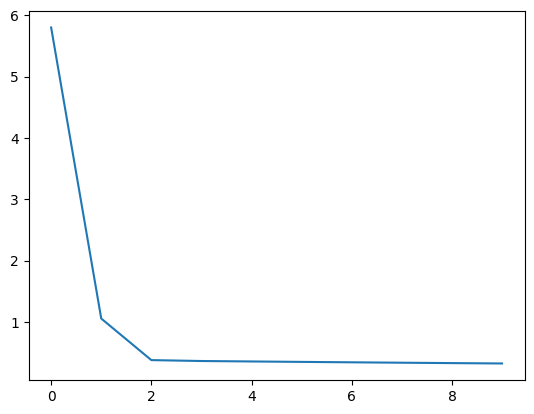

In [16]:
import matplotlib.pyplot as plt
plt.plot(costs)

**다음 같은 값들이 출력되어야 합니다.**: 
<table style="width:40%">
    <tr>
       <td> w </td>
       <td>[[ 0.19033591] [ 0.12259159]] </td>
    </tr>
    <tr>
       <td> b </td>
       <td> 1.92535983008 </td>
    </tr>
    <tr>
       <td> dw </td>
       <td> [[ 0.67752042]
 [ 1.41625495]] </td>
    </tr>
    <tr>
       <td> db </td>
       <td> 0.219194504541 </td>
    </tr>
</table>

**Exercise:** 앞서의 함수는 학습된 w와 b를 출력합니다. 이제, 학습된 w와 b를 이용하여 데이터셋 X에 대해서 값을 예측해봅니다. `predict()`함수를 구현하십시오. 
이 함수는 2가지 단계를 수행합니다. 

1. 예측값인 $\hat{Y} = A = \sigma(w^T X + b)$를 계산합니다.

2. A의 값을 0 (activation <= 0.5인 경우) 또는 1 (activation > 0.5인 경우)로 바꿉니다. 예측된 이 값들을 `Y_prediction`에 저장합니다. 

In [57]:
# GRADED FUNCTION: predict

def predict(w, b, X):
    '''
    Predict whether the label is 0 or 1 using learned logistic regression parameters (w, b)
    
    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of size (num_px * num_px * 3, number of examples)
    
    Returns:
    Y_prediction -- a numpy array (vector) containing all predictions (0/1) for the examples in X
    '''
    
    m = X.shape[1]
    Y_prediction = np.zeros((1,m))
    w = w.reshape(X.shape[0], 1)
    
    # Compute vector "A" predicting the probabilities of a cat being present in the picture
    ### START CODE HERE ### (≈ 1 line of code)
    A = sigmoid(np.dot(w.T, X) + b)                        # Dimentions = (1, m)
    ### END CODE HERE ###
    
    Y_prediction[A > 0.5] = 1
    
    assert(Y_prediction.shape == (1, m))
    
    return Y_prediction

In [58]:
XX = np.random.rand(3,3)
YY = XX > 0.5
print(YY)
XX[YY] = 1. # boolean indexing
print(XX)

[[ True False  True]
 [ True  True  True]
 [ True False False]]
[[1.         0.47187092 1.        ]
 [1.         1.         1.        ]
 [1.         0.36635939 0.31458843]]


In [59]:
w = np.array([[0.1124579],[0.23106775]])
b = -0.3
X = np.array([[1.,-1.1,-3.2],[1.2,2.,0.1]])
print ("predictions = " + str(predict(w, b, X)))

predictions = [[1. 1. 0.]]


**다음 같은 값들이 출력되어야 합니다.**: 

<table style="width:30%">
    <tr>
         <td>
             predictions
         </td>
          <td>
            [[ 1.  1.  0.]]
         </td>  
   </tr>

</table>


**What to remember:**
지금까지 다음의 함수들을 구현하였습니다:
- (W, b)를 초기화
- 파라미터 (w, b)를 학습하기 위해서 loss를 반복적으로 감소시킴:
    - cost와 gradient를 계산
    - gradient descent를 통해 파라미터 갱신
-  학습된 (w, b)를 이용하여 주어진 이미지 입력에 대해서 예측값 생성


## 5 -구현된 모든 기능들을 하나의 모델에 통합합니다. ##

**Exercise:** `model()`함수를 구현합니다. 다음의 표기법이 사용됩니다:
Implement the model function. Use the following notation:
- Y_prediction_test는 test데이터셋에 대한 예측값입니다.
- Y_prediction_train는 train데이터셋에 대한 예측값입니다.
- w, cost, grads는 optimize()함수에서의 출력값입니다.

In [60]:
# GRADED FUNCTION: model

def model(X_train, Y_train, X_test, Y_test, num_iterations = 2000, learning_rate = 0.5, print_cost = False):
    """
    Builds the logistic regression model by calling the function you've implemented previously
    
    Arguments:
    X_train -- training set represented by a numpy array of shape (num_px * num_px * 3, m_train)
    Y_train -- training labels represented by a numpy array (vector) of shape (1, m_train)
    X_test -- test set represented by a numpy array of shape (num_px * num_px * 3, m_test)
    Y_test -- test labels represented by a numpy array (vector) of shape (1, m_test)
    num_iterations -- hyperparameter representing the number of iterations to optimize the parameters
    learning_rate -- hyperparameter representing the learning rate used in the update rule of optimize()
    print_cost -- Set to true to print the cost every 100 iterations
    
    Returns:
    d -- dictionary containing information about the model.
    """
    
   ### START CODE HERE ###

    # Initialize parameters with zeros
    w, b = initialize_with_zeros(X_train.shape[0])  # Shape of X_train gives num_px * num_px * 3

    # Gradient descent
    params, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost)

    # Retrieve parameters w and b from dictionary "parameters"
    w = params["w"] # weight
    b = params["b"] # scala


    # Predict test/train set examples (≈ 2 lines of code)
    Y_prediction_train = predict(w, b, X_train)  # Predictions on training set
    Y_prediction_test = predict(w, b, X_test)    # Predictions on test set


    ### END CODE HERE ###

    # Print train/test Errors
    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))

    
    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d

모델을 학습시키기 위해서 다음의 코드를 실행합니다.

In [74]:
d = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 20000, learning_rate = 0.002, print_cost = False)

train accuracy: 100.0 %
test accuracy: 70.0 %


**다음 같은 값들이 출력되어야 합니다.**: 
<table style="width:40%"> 
    <tr>
        <td> Cost after iteration 0  </td> 
        <td> 0.693147 </td>
    </tr>
    <tr>
        <td> Train Accuracy  </td> 
        <td> 99.04306220095694 % </td>
    </tr>
    <tr>
        <td>Test Accuracy </td> 
        <td> 70.0 % </td>
    </tr>
</table> 

**Comment**: training 예측 정확도는 100%에 가깝습니다. 이건 모델이 학습데이터를 충분히 학습할만한 용량을 가지고 있다는 것을 말해줍니다. 그러나, test 예측 정확도는 약 70%입니다. Logistic regression과 같은 매우 단순한 모델에서 이정도의 정확도는 그다지 나쁜것은 아닙니다. 앞으로, 여러가지 방법들을 사용하여 정확도를 계속 높여 나갈 것입니다. 

지금처럼 training 정확도와 test정확도가 차이가 많이 나는 것을 과적합(overfitting)되었다고 합니다. 앞으로 배울 정규화(regularization)와 같은 방법을 사용하여 과적합을 줄일수 있습니다. 

아래에서 `index`값을 바꾸어서 test데이터에 대해서 예측값들이 어떤지를 살펴봅니다.

1.0
y = 1, you predicted that it is a "cat" picture.


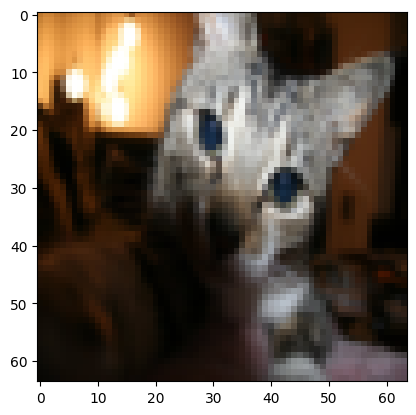

In [67]:
# Example of a picture that was wrongly classified.
index = 40
print(d["Y_prediction_test"][0,index])
plt.imshow(test_set_x[:,index].reshape((num_px, num_px, 3)))
print ("y = " + str(test_set_y[0,index]) + ", you predicted that it is a \"" + classes[int(d["Y_prediction_test"][0,index])].decode("utf-8") +  "\" picture.")

학습동안 cost함수 값이 어떻게 변하는지를 살펴봅니다.

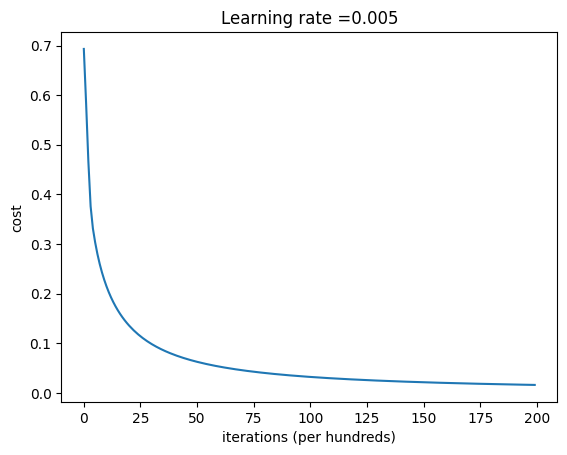

In [68]:
# Plot learning curve (with costs)
costs = np.squeeze(d['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(d["learning_rate"]))
plt.show()

**Interpretation**:
cost값이 감소하는 것을 볼수 있습니다. 이것은 파라미터 학습이 이루어지고 있음을 보입니다. iteratgions를 늘려서 학습시간을 늘릴수도 있습니다. 학습시간을 늘리면, traing예측정확도는 높아지지만, test 예측 정확도는 오히려 감소하는 것을 발견하게 될것입니다. 이것을 과적합(overfitting)이 발생하고 있다고 합니다. 


## 6 - Further analysis (optional/ungraded exercise) ##

축하합니다. 당신의 첫번째 이미지 분류 모델을 완성하였습니다. 
이제 learing rate인 $\alpha$를 달리할때 어떤 영향이 있는지 살펴봅니다.

#### Choice of learning rate ####

**Reminder**:
Gradient descent가 제대로 동작하기 위해서는 learning rate를 잘 설정해야합니다. Learning rate $\alpha$는 파라미터가 얼마나 빨리 갱신될지를 결정합니다. 
만약에 learing rate가 너무 크면 "overshoot"가 발생합니다. 반대로, learing rate가 너무 작으면 학습속도가 너무 느려지게 됩니다. 

우리 모델에서 learing rate값을 달리하면서 cost가 어떻게 감소하는지 비교해봅니다. 

learning rate is: 0.01
train accuracy: 99.52153110047847 %
test accuracy: 68.0 %

-------------------------------------------------------

learning rate is: 0.001
train accuracy: 88.99521531100478 %
test accuracy: 64.0 %

-------------------------------------------------------

learning rate is: 0.0001
train accuracy: 68.42105263157895 %
test accuracy: 36.0 %

-------------------------------------------------------



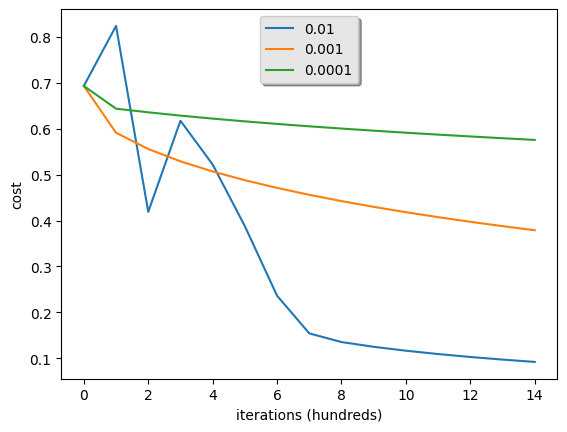

In [69]:
learning_rates = [0.01, 0.001, 0.0001]
models = {}
for i in learning_rates:
    print ("learning rate is: " + str(i))
    models[str(i)] = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 1500, learning_rate = i, print_cost = False)
    print ('\n' + "-------------------------------------------------------" + '\n')

for i in learning_rates:
    plt.plot(np.squeeze(models[str(i)]["costs"]), label= str(models[str(i)]["learning_rate"]))

plt.ylabel('cost')
plt.xlabel('iterations (hundreds)')

legend = plt.legend(loc='upper center', shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.90')
plt.show()

**Interpretation**: 
- learing rate가 바뀌면, cost값들도 바뀌고 예측결과도 바뀐다. 
- learing rate가 너무 크면 (예: 0.01), cost값이 위 아래로 요동치게 됩니다. 
